In [51]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector
from IPython.display import display, Math, Latex
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt

In [52]:
state_H = [1, 0]
state_V = [0, 1]
state_P = [1/sqrt(2), 1/sqrt(2)]
state_M = [1/sqrt(2), -1/sqrt(2)]
state_L = [1/sqrt(2), 1j/sqrt(2)]
state_R = [1/sqrt(2), -1j/sqrt(2)] 

In [53]:
# input states
input_state_a = state_H
input_state_b = state_H

<IPython.core.display.Latex object>

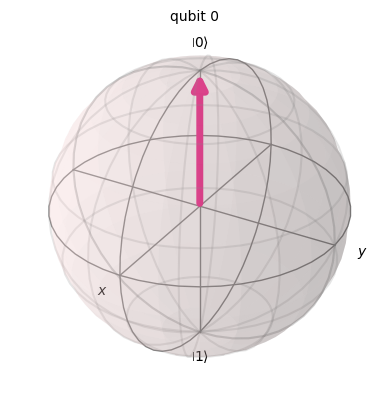

In [54]:
# normalize and display a
en_a = sqrt(np.abs(input_state_a[0])**2 + np.abs(input_state_a[1])**2)
state_a = [input_state_a[0]/en_a, input_state_a[1]/en_a]
display(Statevector(state_a).draw(output='latex'))
display(plot_bloch_multivector(state_a))

<IPython.core.display.Latex object>

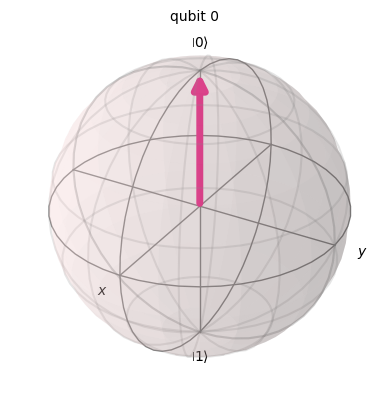

In [55]:
# normalize and display b
en_b = sqrt(np.abs(input_state_b[0])**2 + np.abs(input_state_b[1])**2)
state_b = [input_state_b[0]/en_b, input_state_b[1]/en_b]
display(Statevector(state_b).draw(output='latex'))
display(plot_bloch_multivector(state_b))

<IPython.core.display.Latex object>

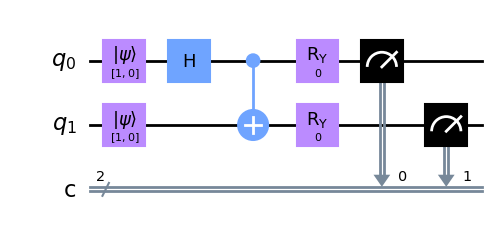

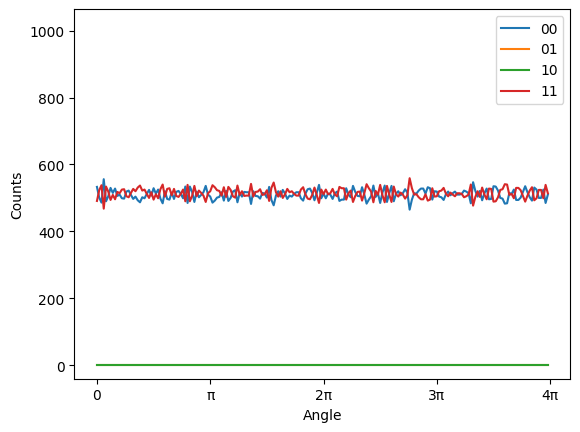

In [56]:
# N = how many rotation steps
N = 200

# numShots = how many times to run each circuit
numShots = 1024

x_val = []
y_val = [[], [], [], []]
states = ['00', '01', '10', '11']

qc = QuantumCircuit(2, 2)

for i in range(N):
    # build the circuit and initialize the starting states
    qc.clear()
    qc = QuantumCircuit(2, 2)
    qc.initialize(state_a, 0)
    qc.initialize(state_b, 1)
    
    # extra gates go here
    qc.h(0)
    qc.cx(0, 1)
    
    # rotate 
    delta = 4*i*pi/N
    qc.ry(delta, 0)
    qc.ry(delta, 1)
    
    if i == 0:
        display(Statevector(qc).draw(output='latex'))
    
    qc.measure([0,1], [0,1])
    
    # display the circuit for the first time
    if i == 0:
        display(qc.draw(output='mpl'))
    
    # simulate
    backend = Aer.get_backend('qasm_simulator')
    job = backend.run(transpile(qc, backend), shots=numShots)
    result = job.result()
    counts = result.get_counts(qc)
    
    x_val.append(delta)
    
    # put in zeros for the counts if needed
    out = [0, 0, 0, 0]
    for j in range(4):
        if states[j] in counts:
            out[j] = counts[states[j]]
        y_val[j].append(out[j])
    
# graph
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(x_val, y_val[i], label = states[i])
    
ax.set_xlabel("Angle")
ax.set_ylabel("Counts")
ax.set_ylim(0 - 40, numShots + 40)
x_ticks = ax.set_xticks([0, pi, 2*pi, 3*pi, 4*pi], ['0', 'π', '2π', '3π', '4π'])
legend = plt.legend()